In [2]:
import os
import pandas as pd


df = pd.read_csv(r"C:\Users\G\Desktop\AI_Fraud_Detection_Project\data\creditcard.csv")


print(df.head())




   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
!pip install pandas scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(df.isnull().sum())

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)





Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [34]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 199364
Testing samples: 85443


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model banayein
model = LogisticRegression()

# Train karo
model.fit(X_train, y_train)

# Predict karo test data par
y_pred = model.predict(X_test)

# Evaluate karo model ko
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📄 Classification Report:\n", classification_report(y_test, y_pred))


📊 Accuracy: 0.9991222218320986
📉 Confusion Matrix:
 [[85279    16]
 [   59    89]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



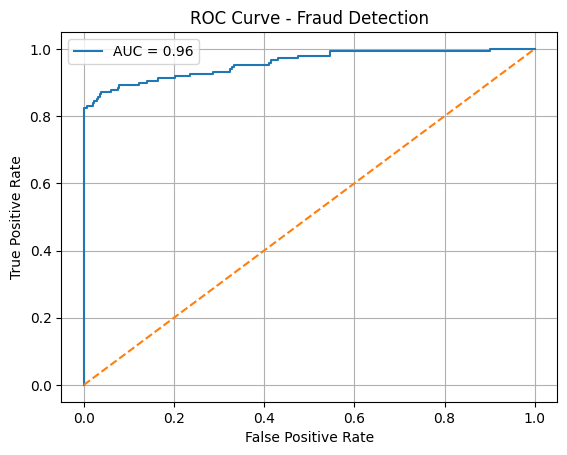

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities nikaal
y_probs = model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
import joblib

# Save model
joblib.dump(model, "fraud_detection_model.pkl")

# Save scaler too
joblib.dump(scaler, "scaler.pkl")

print("Model & Scaler Saved ✅")


Model & Scaler Saved ✅


In [40]:
import joblib
import numpy as np

# Load trained model and scaler
model = joblib.load("fraud_detection_model.pkl")
scaler = joblib.load("scaler.pkl")



In [43]:
# Example sample — exactly 30 values (V1 to V28, 'Amount', 'Time')
sample = np.array([[0.1, -1.2, 0.3, -0.5, 1.5, 0.6, -0.4, 0.0, 0.2, -1.3,
                    0.8, 0.9, -0.2, -0.6, 1.1, -0.8, 0.4, 0.3, -0.9, 1.2,
                    -0.1, -1.1, 0.6, 0.7, -0.5, 1.3, 0.0, 250.0, 50000.0, 0.0]])

# Scale karo
sample_scaled = scaler.transform(sample)

# Predict karo
prediction = model.predict(sample_scaled)

# Output
print("🛑 Fraud Transaction" if prediction[0] == 1 else "✅ Legit Transaction")


✅ Legit Transaction


C:\Users\G\.conda\envs\itsmehh\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
# Pick a known fraud sample from original dataset
fraud_sample = df[df['Class'] == 1].iloc[0].drop("Class")  # Remove label

# Reshape and scale
fraud_scaled = scaler.transform([fraud_sample])
pred = model.predict(fraud_scaled)

print("🛑 Fraud Transaction" if pred[0] == 1 else "✅ Legit Transaction")


✅ Legit Transaction


C:\Users\G\.conda\envs\itsmehh\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
prob = model.predict_proba(fraud_scaled)[0]
print(f"Legit Probability: {prob[0]*100:.2f}%")
print(f"Fraud Probability: {prob[1]*100:.2f}%")


Legit Probability: 58.47%
Fraud Probability: 41.53%


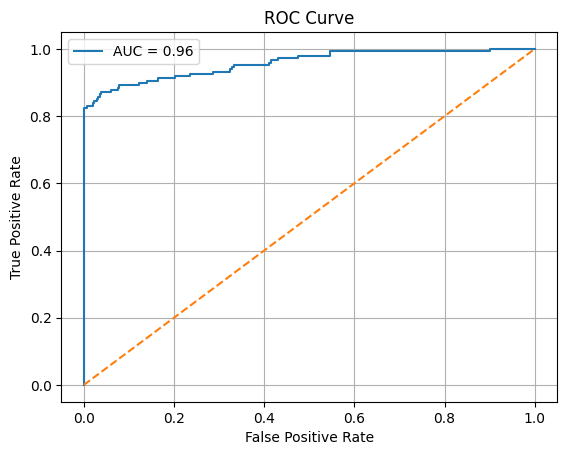

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
